## Import a utility script with functions to be used with the results of GridSearchCV

###### This is a library that i created to help people to see the result of grid and random search
##### __author__ = "Diogo Hajjar"
#### https://github.com/Dighzy/search_plot_utils

In [6]:
!pip install search-plot-utils==0.1.1

Defaulting to user installation because normal site-packages is not writeable


# Imports




In [2]:
# First Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

import statsmodels.api as sn

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, precision_score,roc_auc_score,accuracy_score

from search_plot_utils import plot_grid_search, plot_grid_search_non_interactive, table_grid_search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import random 
random.seed(4)


# Import the functions

In [48]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score)

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Predictions for the test set
    y_pred_test = model.predict(X_test)
    y_prob_test = model.predict_proba(X_test)
    
    # Metrics for the test set
    ac_test = accuracy_score(y_test, y_pred_test)
    pre_test = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
    rec_test = recall_score(y_test, y_pred_test, average='weighted', zero_division=0)
    f1_test = f1_score(y_test, y_pred_test, average='weighted', zero_division=0)
    
    # Predictions for the training set
    y_pred_train = model.predict(X_train)
    y_prob_train = model.predict_proba(X_train)
    
    # Metrics for the training set
    ac_train = accuracy_score(y_train, y_pred_train)
    pre_train = precision_score(y_train, y_pred_train, average='weighted', zero_division=0)
    rec_train = recall_score(y_train, y_pred_train, average='weighted', zero_division=0)
    f1_train = f1_score(y_train, y_pred_train, average='weighted', zero_division=0)

    # Print metrics
    print(f'{model_name} Performance Metrics:')
    print(f'\nTest Set Metrics:')
    print(f'Accuracy: {ac_test}')
    print(f'Precision: {pre_test}')
    print(f'Recall: {rec_test}')
    print(f'F1 Score: {f1_test}')
    
    print(f'\nTrain Set Metrics:')
    print(f'Accuracy: {ac_train}')
    print(f'Precision: {pre_train}')
    print(f'Recall: {rec_train}')
    print(f'F1 Score: {f1_train}')
    
    # Storing scores in the model_scores dictionary
    model_scores[model_name] = {
        'Test': {
            'Accuracy': ac_test,
            'Precision': pre_test,
            'Recall': rec_test,
            'F1 Score': f1_test
        },
        'Train': {
            'Accuracy': ac_train,
            'Precision': pre_train,
            'Recall': rec_train,
            'F1 Score': f1_train
        }
    }
    
    return y_pred_test, y_pred_train


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrices(y_test, y_pred_test, y_train, y_pred_train, class_names):
    # Compute confusion matrices
    confusion_test = confusion_matrix(y_test, y_pred_test)
    confusion_train = confusion_matrix(y_train, y_pred_train)
    
    # Plot and save confusion matrix for test set
    plt.figure(figsize=(15, 10))
    sns.heatmap(confusion_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - Test')
    plt.show()

    # Plot and save confusion matrix for training set
    plt.figure(figsize=(15, 10))
    sns.heatmap(confusion_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - Train')
    plt.show()

# Example usage
# y_pred_test, y_pred_train = evaluate_model(model, X_train, X_test, y_train, y_test, model_name)
# plot_confusion_matrices(y_test, y_pred_test, y_train, y_pred_train, class_names)



# Data Processing

##### Importing tha data sets and using head(10) to view the data

In [4]:
# Main data set

df = pd.read_csv("dataset/Pollen_Concentration_train_test.csv")
df.head(10)

,OBJECTID,AQI,Category,ResponsiblePollutant,PollenCount,PollenType,PollenDescription,ReportDateTime
0,1,74.0,Moderate,Ozone 8-hr,3.0,Grass,Ragweed,2016/07/23 05:00:00+00
1,2,64.0,Moderate,Ozone 8-hr,4.0,Grass,Ragweed,2016/07/22 05:00:00+00
2,3,55.0,Moderate,PM2.5,3.0,Grass,Slight,2016/07/21 05:00:00+00
3,4,57.0,Moderate,PM2.5,4.0,Grass,Slight,2016/07/20 05:00:00+00
4,5,54.0,Moderate,PM2.5,3.0,Grass,Slight,2016/07/19 05:00:00+00
5,6,46.0,Good,Ozone 8-hr,3.0,Grass,Slight,2016/07/18 05:00:00+00
6,7,48.0,Good,Ozone 8-hr,3.0,Grass,Slight,2016/07/17 05:00:00+00
7,8,74.0,Moderate,Ozone 8-hr,3.0,Grass,Slight,2016/07/16 05:00:00+00
8,10,47.0,Good,PM2.5,2.0,Grass,Slight,2016/07/14 05:00:00+00
9,11,61.0,Moderate,PM2.5,3.0,Grass,Slight,2016/07/13 05:00:00+00


#### Data verification and visualization

In [5]:
# Checking descriptive statistics to check the mathematical values of the DataFrame
df.describe()

,OBJECTID,AQI,PollenCount
count,8659.000000,8431.000000,4911.000000
mean,4358.988913,45.144230,16.523315
std,2514.384548,16.775563,68.501783
min,1.000000,0.000000,0.000000
25%,2180.500000,34.000000,3.000000
50%,4363.000000,44.000000,6.000000
75%,6536.500000,53.000000,9.000000
max,8709.000000,151.000000,1666.000000


In [6]:
# Checking the data and Dtype
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8659 entries, 0 to 8658
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECTID              8659 non-null   int64  
 1   AQI                   8431 non-null   float64
 2   Category              8659 non-null   object 
 3   ResponsiblePollutant  8429 non-null   object 
 4   PollenCount           4911 non-null   float64
 5   PollenType            4523 non-null   object 
 6   PollenDescription     8539 non-null   object 
 7   ReportDateTime        8659 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 541.3+ KB


In [7]:
# shape of df
df.shape

(8659, 8)

In [8]:
# Checking na values
df.isnull().sum()

OBJECTID                   0
AQI                      228
Category                   0
ResponsiblePollutant     230
PollenCount             3748
PollenType              4136
PollenDescription        120
ReportDateTime             0
dtype: int64

# Replacing missing values

In [9]:
# Replacing missing values with the median to maintain data consistency without introducing bias
df['PollenCount'] = df['PollenCount'].fillna(df['PollenCount'].median())
df['AQI'] = df['AQI'].fillna(df['AQI'].median())

df.isnull().sum()


OBJECTID                   0
AQI                        0
Category                   0
ResponsiblePollutant     230
PollenCount                0
PollenType              4136
PollenDescription        120
ReportDateTime             0
dtype: int64

In [10]:
# Replacing categorical missing values with the mode 
df['ResponsiblePollutant'] = df['ResponsiblePollutant'].fillna(df['ResponsiblePollutant'].mode()[0])
df['PollenType'] = df['PollenType'].fillna(df['PollenType'].mode()[0])
df['PollenDescription'] = df['PollenDescription'].fillna(df['PollenType'].mode()[0])

df.isnull().sum()

OBJECTID                0
AQI                     0
Category                0
ResponsiblePollutant    0
PollenCount             0
PollenType              0
PollenDescription       0
ReportDateTime          0
dtype: int64

In [11]:
# Checking descriptive statistics to check the mathematical values of the DataFrame
df.describe()

,OBJECTID,AQI,PollenCount
count,8659.000000,8659.000000,8659.000000
mean,4358.988913,45.114101,11.968357
std,2514.384548,16.554220,51.849093
min,1.000000,0.000000,0.000000
25%,2180.500000,34.000000,5.000000
50%,4363.000000,44.000000,6.000000
75%,6536.500000,52.000000,7.000000
max,8709.000000,151.000000,1666.000000


## Transforming the ReportDateTime Column into a more meaningful features


In [12]:
### Time-Based Features:

#- **Weekday**: To see if pollen concentrations have correlation with certain days.

# Weekday
df['ReportDateTime'] = pd.to_datetime(df['ReportDateTime'])
df['weekday'] = df['ReportDateTime'].dt.weekday
df['month'] = df['ReportDateTime'].dt.month
df['hour'] = df['ReportDateTime'].dt.hour

print(df[['weekday', 'month', 'hour']].tail())

      weekday  month  hour
8654        0     12     6
8655        6     12     6
8656        5     12     6
8657        4     12     6
8658        3     12     6


# Droping unnecessary columns

In [13]:
df = df.drop(['OBJECTID','ReportDateTime'],axis=1)
df.head(3)

,AQI,Category,ResponsiblePollutant,PollenCount,PollenType,PollenDescription,weekday,month,hour
0,74.0,Moderate,Ozone 8-hr,3.0,Grass,Ragweed,5,7,5
1,64.0,Moderate,Ozone 8-hr,4.0,Grass,Ragweed,4,7,5
2,55.0,Moderate,PM2.5,3.0,Grass,Slight,3,7,5


# Seeing the categorical values

In [14]:
categoricals = ['Category', 'ResponsiblePollutant', 'PollenType', 'PollenDescription']
for value in categoricals:
    print(df[value].value_counts())
    print()

Category
Good                              5823
Moderate                          2527
Not on file                        228
Unhealthy for Sensitive Groups      76
Unhealthy                            4
SLIGHT                               1
Name: count, dtype: int64

ResponsiblePollutant
PM2.5              6247
Ozone 8-hr         2292
Carbon monoxide      85
PM10                 30
Oz                    3
Ozone 1-hr            2
Name: count, dtype: int64

PollenType
Grass        6433
Ragweed       547
Cedar         402
Elm           363
Alder         274
Juniper       223
Birch         176
Maple         131
Hickory        86
Oak            15
Pine            3
Mulberry        2
Goldenrod       1
Poplar          1
Ash             1
Hackberry       1
Name: count, dtype: int64

PollenDescription
Not on file        3624
Slight             1242
 Maple              857
 Ragweed            806
 Grass              499
 Juniper            348
Moderate            294
 Mulberry           171
 C

# Creating Dummies

In [15]:
# Creating dummies for the categorical columns 
df = pd.get_dummies(df, drop_first=True)

In [16]:
df.head(3)

,AQI,PollenCount,weekday,month,hour,Category_Moderate,Category_Not on file,Category_SLIGHT,Category_Unhealthy,Category_Unhealthy for Sensitive Groups,...,PollenDescription_ Poplar,PollenDescription_ Ragweed,PollenDescription_ Sweet Gum,PollenDescription_ Walnut,PollenDescription_Extremely Heavy,PollenDescription_Grass,PollenDescription_Heavy,PollenDescription_Moderate,PollenDescription_Not on file,PollenDescription_Slight
0,74.0,3.0,5,7,5,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,64.0,4.0,4,7,5,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,55.0,3.0,3,7,5,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


#### Ploting a correlation matrix to see the correlation of the columns 

In [17]:
df.corr()

,AQI,PollenCount,weekday,month,hour,Category_Moderate,Category_Not on file,Category_SLIGHT,Category_Unhealthy,Category_Unhealthy for Sensitive Groups,...,PollenDescription_ Poplar,PollenDescription_ Ragweed,PollenDescription_ Sweet Gum,PollenDescription_ Walnut,PollenDescription_Extremely Heavy,PollenDescription_Grass,PollenDescription_Heavy,PollenDescription_Moderate,PollenDescription_Not on file,PollenDescription_Slight
AQI,1.000000,0.041789,0.018212,0.062714,-0.360143,0.673896,-0.011068,0.009665,0.106996,0.369302,...,0.066879,0.078809,0.016322,0.012312,0.030479,-0.036565,0.035588,0.111346,-0.258332,0.118355
PollenCount,0.041789,1.000000,-0.058717,-0.092715,-0.064938,0.060924,-0.018931,-0.002274,-0.002786,-0.010570,...,-0.012328,-0.022888,-0.009500,-0.000899,0.035882,-0.013647,0.011481,-0.013550,-0.097664,-0.077070
weekday,0.018212,-0.058717,1.000000,-0.002336,-0.008460,0.009255,0.028518,0.005682,0.000550,0.006766,...,-0.012373,-0.085803,0.001573,-0.021768,-0.022992,-0.051147,-0.024505,-0.061298,0.288474,-0.084359
month,0.062714,-0.092715,-0.002336,1.000000,-0.115991,0.064585,0.009287,0.001682,0.000222,0.023774,...,-0.014514,0.202585,-0.037527,-0.020603,0.005291,-0.059713,0.006058,0.039776,0.000401,0.191465
hour,-0.360143,-0.064938,-0.008460,-0.115991,1.000000,-0.229722,-0.054671,-0.008086,-0.016175,-0.068223,...,-0.076675,-0.231117,-0.065940,-0.036202,-0.036055,0.157557,-0.028549,-0.118491,0.578898,-0.209135
Category_Moderate,0.673896,0.060924,0.009255,0.064585,-0.229722,1.000000,-0.105567,-0.006899,-0.013801,-0.060407,...,0.032810,0.050520,0.028447,0.022032,0.023314,-0.015255,0.023138,0.077428,-0.164585,0.078665
Category_Not on file,-0.011068,-0.018931,0.028518,0.009287,-0.054671,-0.105567,1.000000,-0.001767,-0.003535,-0.015474,...,-0.016758,-0.050201,-0.014412,-0.007912,-0.011617,-0.019495,-0.013386,-0.030830,0.187987,-0.065236
Category_SLIGHT,0.009665,-0.002274,0.005682,0.001682,-0.008086,-0.006899,-0.001767,1.000000,-0.000231,-0.001011,...,-0.001095,-0.003443,-0.000942,-0.000517,-0.000759,-0.001274,-0.000875,-0.002015,-0.009118,0.026263
Category_Unhealthy,0.106996,-0.002786,0.000550,0.000222,-0.016175,-0.013801,-0.003535,-0.000231,1.000000,-0.002023,...,-0.002191,-0.006887,-0.001884,-0.001034,-0.001519,-0.002548,-0.001750,0.025645,-0.018239,0.021869
Category_Unhealthy for Sensitive Groups,0.369302,-0.010570,0.006766,0.023774,-0.068223,-0.060407,-0.015474,-0.001011,-0.002023,1.000000,...,0.051790,0.029514,-0.008247,-0.004528,0.010966,-0.011155,0.022962,0.037051,-0.037165,0.035673


In [17]:
# Identify columns with high correlation (> 0.70) to detect potential multicollinearity issues
df_corr = pd.DataFrame(df.corr())

for column in df_corr.columns:
    # Check if correlation with any other column is greater than 0.85
    high_corr_columns = df_corr.columns[(df_corr[column].abs() > 0.70) & (df_corr[column].index != column)]
    
    if len(high_corr_columns) > 0:
        print(f"Column '{column}' has high correlation with the following columns:")
        for correlated_column in high_corr_columns:
            print(f"- '{correlated_column}' (Correlation: {df_corr.loc[column, correlated_column]})")


Column 'ResponsiblePollutant_Ozone 8-hr' has high correlation with the following columns:
- 'ResponsiblePollutant_PM2.5' (Correlation: -0.9655771570042371)
Column 'ResponsiblePollutant_PM2.5' has high correlation with the following columns:
- 'ResponsiblePollutant_Ozone 8-hr' (Correlation: -0.9655771570042371)
Column 'PollenType_Hickory' has high correlation with the following columns:
- 'PollenDescription_ Sweet Gum' (Correlation: 0.8750175187199051)
Column 'PollenDescription_ Sweet Gum' has high correlation with the following columns:
- 'PollenType_Hickory' (Correlation: 0.8750175187199051)


# Data Vizualization 

### Correlation of the variables

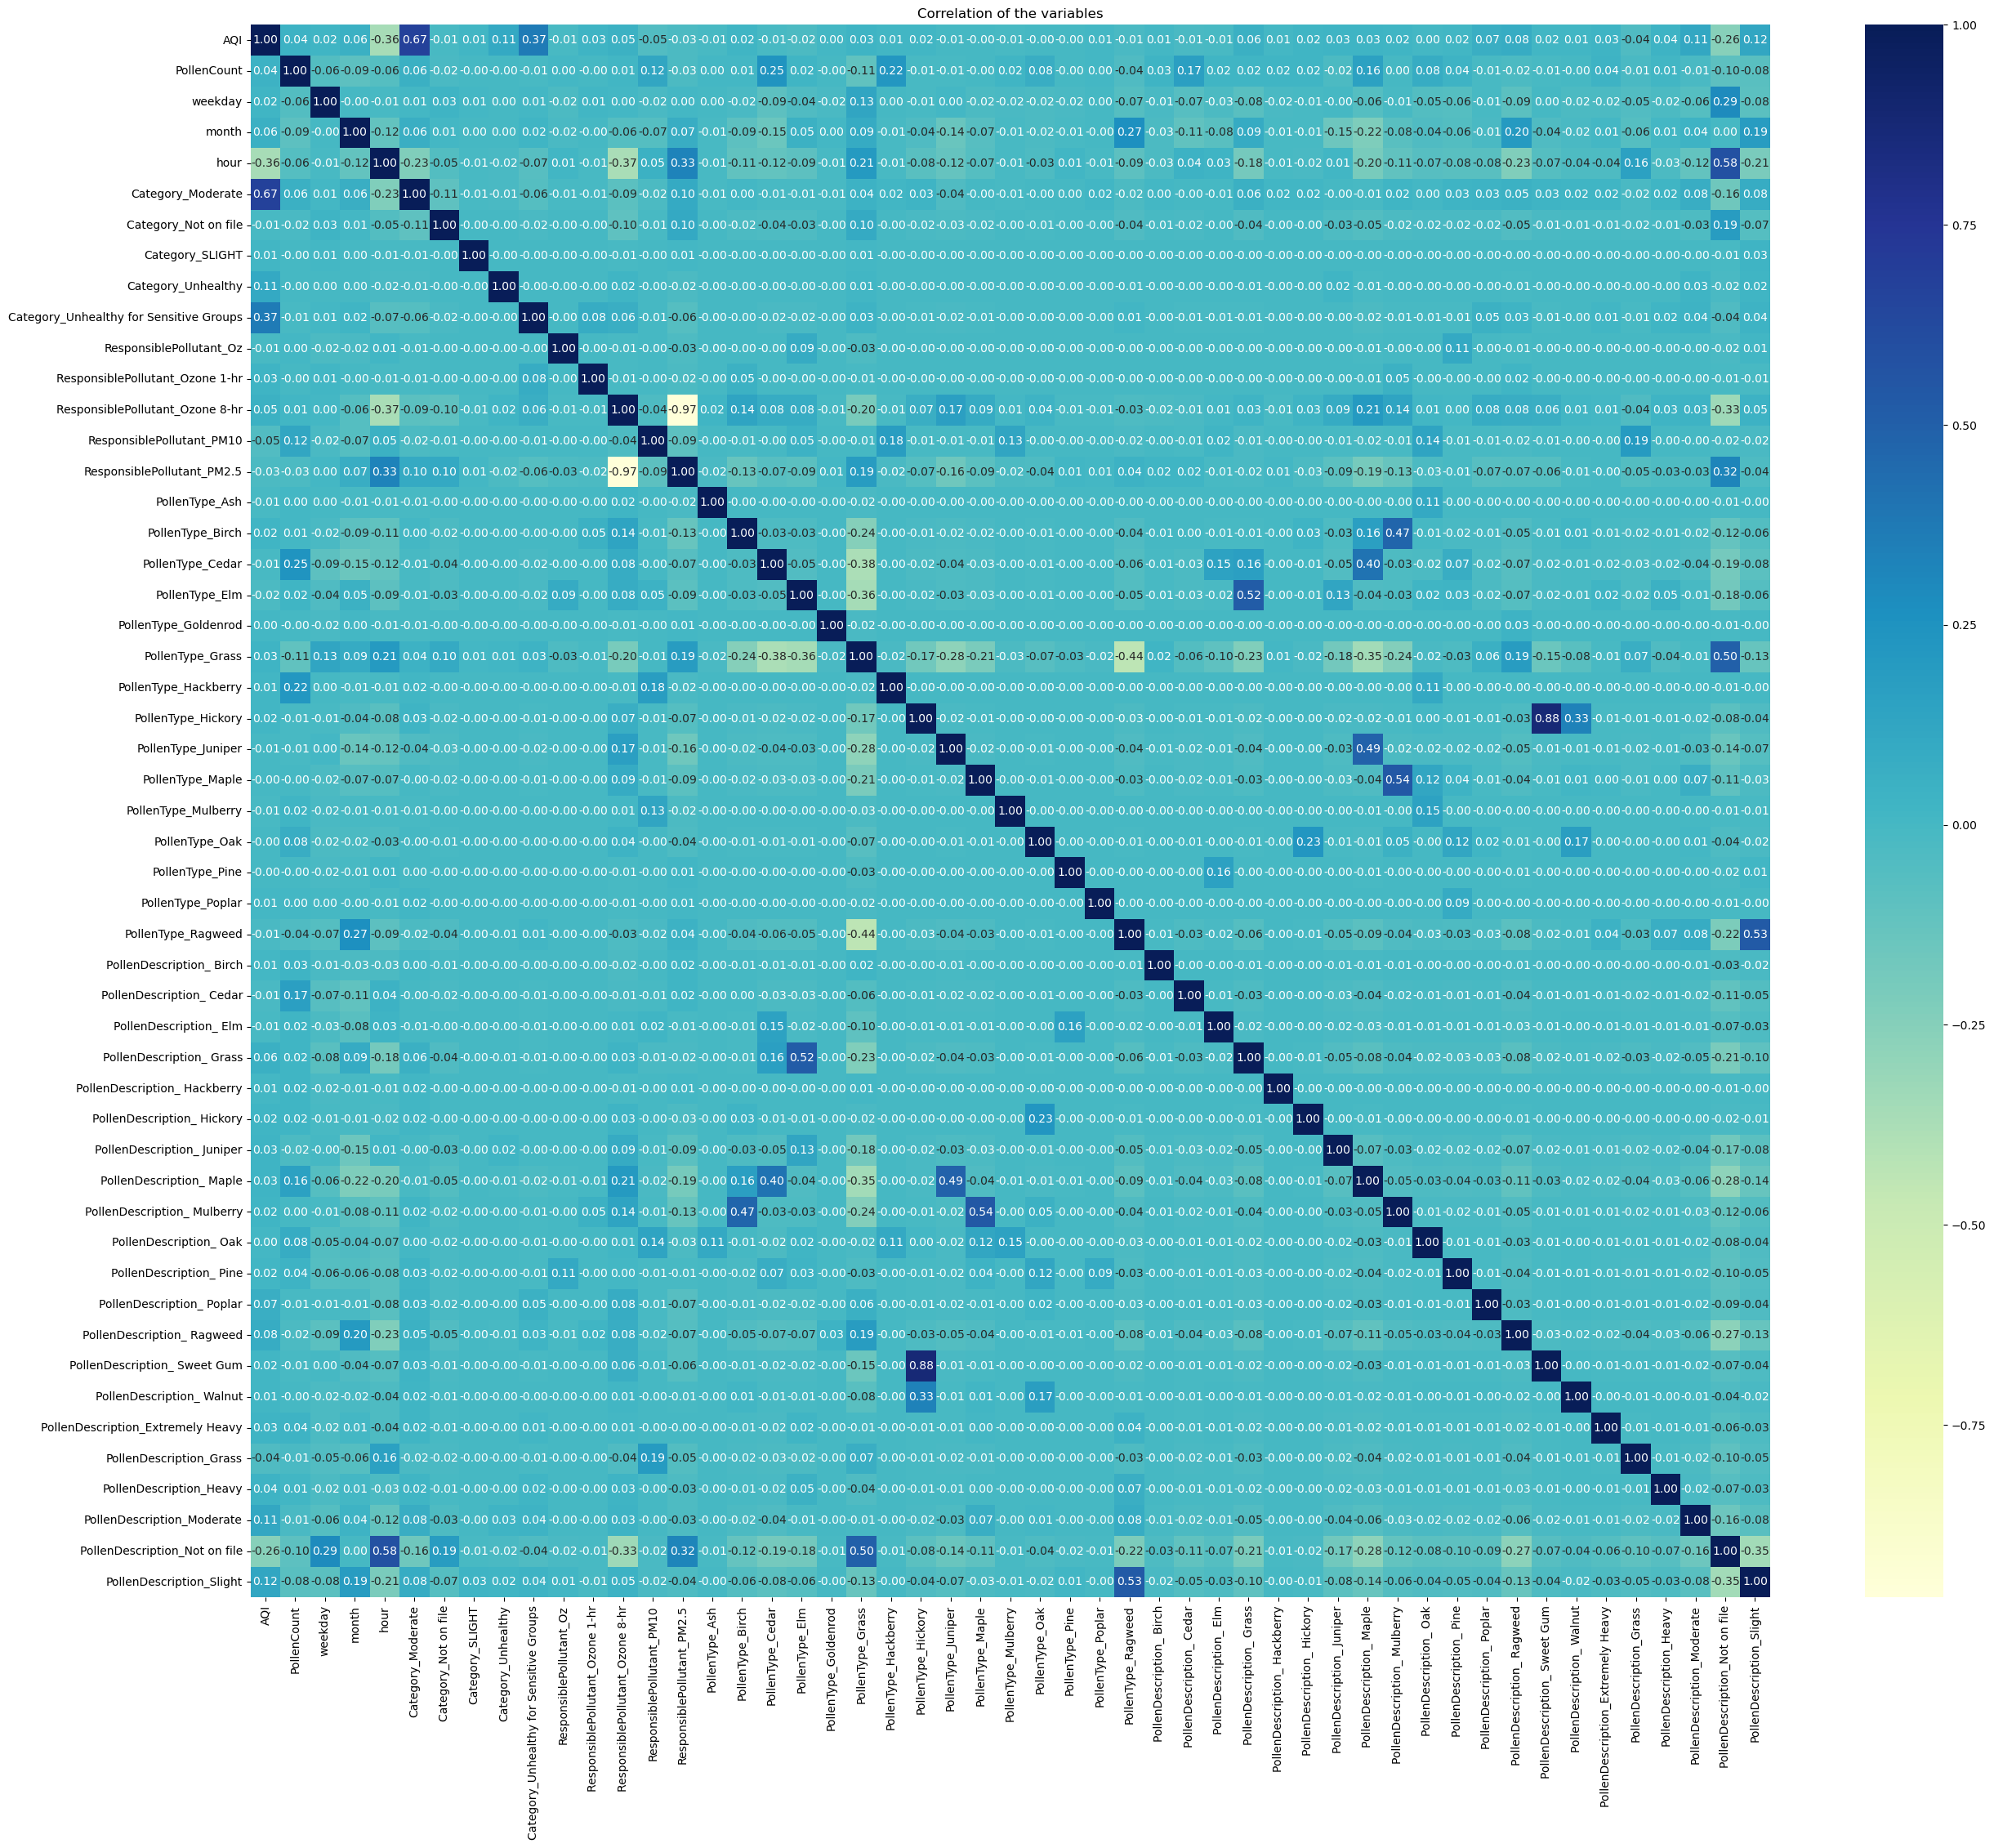

In [18]:
# Ploting a correlation matrix to see the correlation of the columns 
plt.figure(figsize=(30, 25))


corr_graph = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt=".2f")

plt.title("Correlation of the variables")
plt.show()

# Avoiding data redundancy 

In [19]:
# Removing variables that have high correlation with other variables
# and a weaker correlation with the target variable 'PollenCount'

# Dropping 'ResponsiblePollutant_PM2.5' and 'PollenDescription_Sweet Gum' because:
# 1. 'ResponsiblePollutant_PM2.5' is highly correlated with 'ResponsiblePollutant_Ozone 8-hr'
#    but has a weaker correlation with 'PollenCount'.
# 2. 'PollenDescription_Sweet Gum' is highly correlated with 'PollenType_Hickory'
#    but has a weaker correlation with 'PollenCount'.

df = df.drop(['ResponsiblePollutant_PM2.5','PollenDescription_ Sweet Gum'],axis=1)
df.head(3)

,AQI,PollenCount,weekday,month,hour,Category_Moderate,Category_Not on file,Category_SLIGHT,Category_Unhealthy,Category_Unhealthy for Sensitive Groups,...,PollenDescription_ Pine,PollenDescription_ Poplar,PollenDescription_ Ragweed,PollenDescription_ Walnut,PollenDescription_Extremely Heavy,PollenDescription_Grass,PollenDescription_Heavy,PollenDescription_Moderate,PollenDescription_Not on file,PollenDescription_Slight
0,74.0,3.0,5,7,5,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,64.0,4.0,4,7,5,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,55.0,3.0,3,7,5,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


### All variables in scatter plot

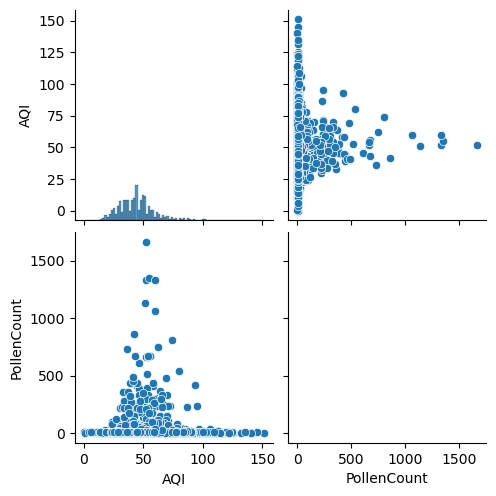

In [20]:
numerical = ['AQI', 'PollenCount']
sns.pairplot(df[numerical], kind="scatter")

## BoxPlots 

### Creating BoxPlot to check  for outliers in data

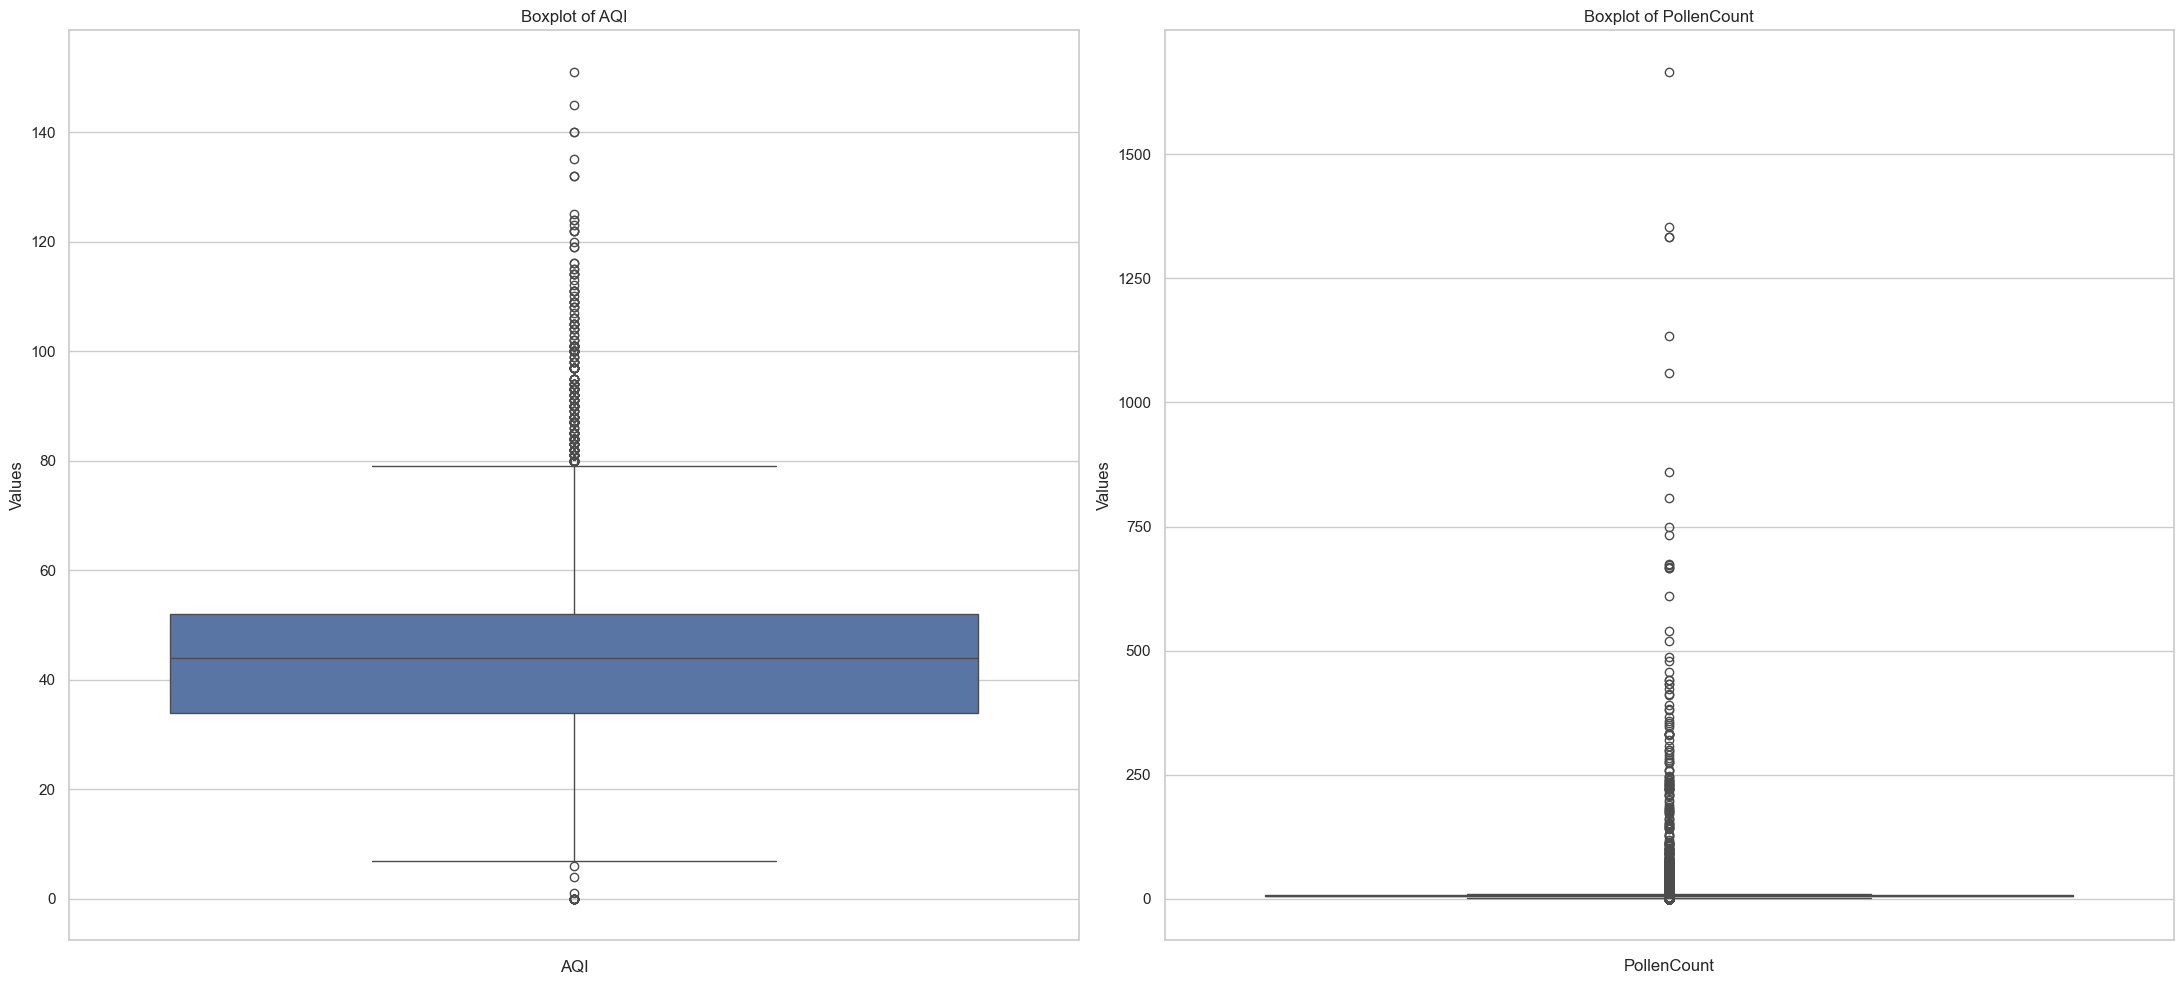

In [21]:
# Using a method to view all box plots individually in a row
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, len(df[numerical].columns), figsize=(22, 10))

for i, col in enumerate(df[numerical].columns):
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Values')

plt.tight_layout()

plt.show()


# Outliers Treatment

## Handling outliers

### Percentile method


In [22]:
# Function to handle outliers with percentile method
def handling_outliers(df, low_percentile=2, high_percentile=97):
    for col in df[numerical].columns:
        low = np.percentile(df[col], low_percentile)
        high = np.percentile(df[col], high_percentile)
        df[col] = np.clip(df[col], low, high)
    return df

df = handling_outliers(df)

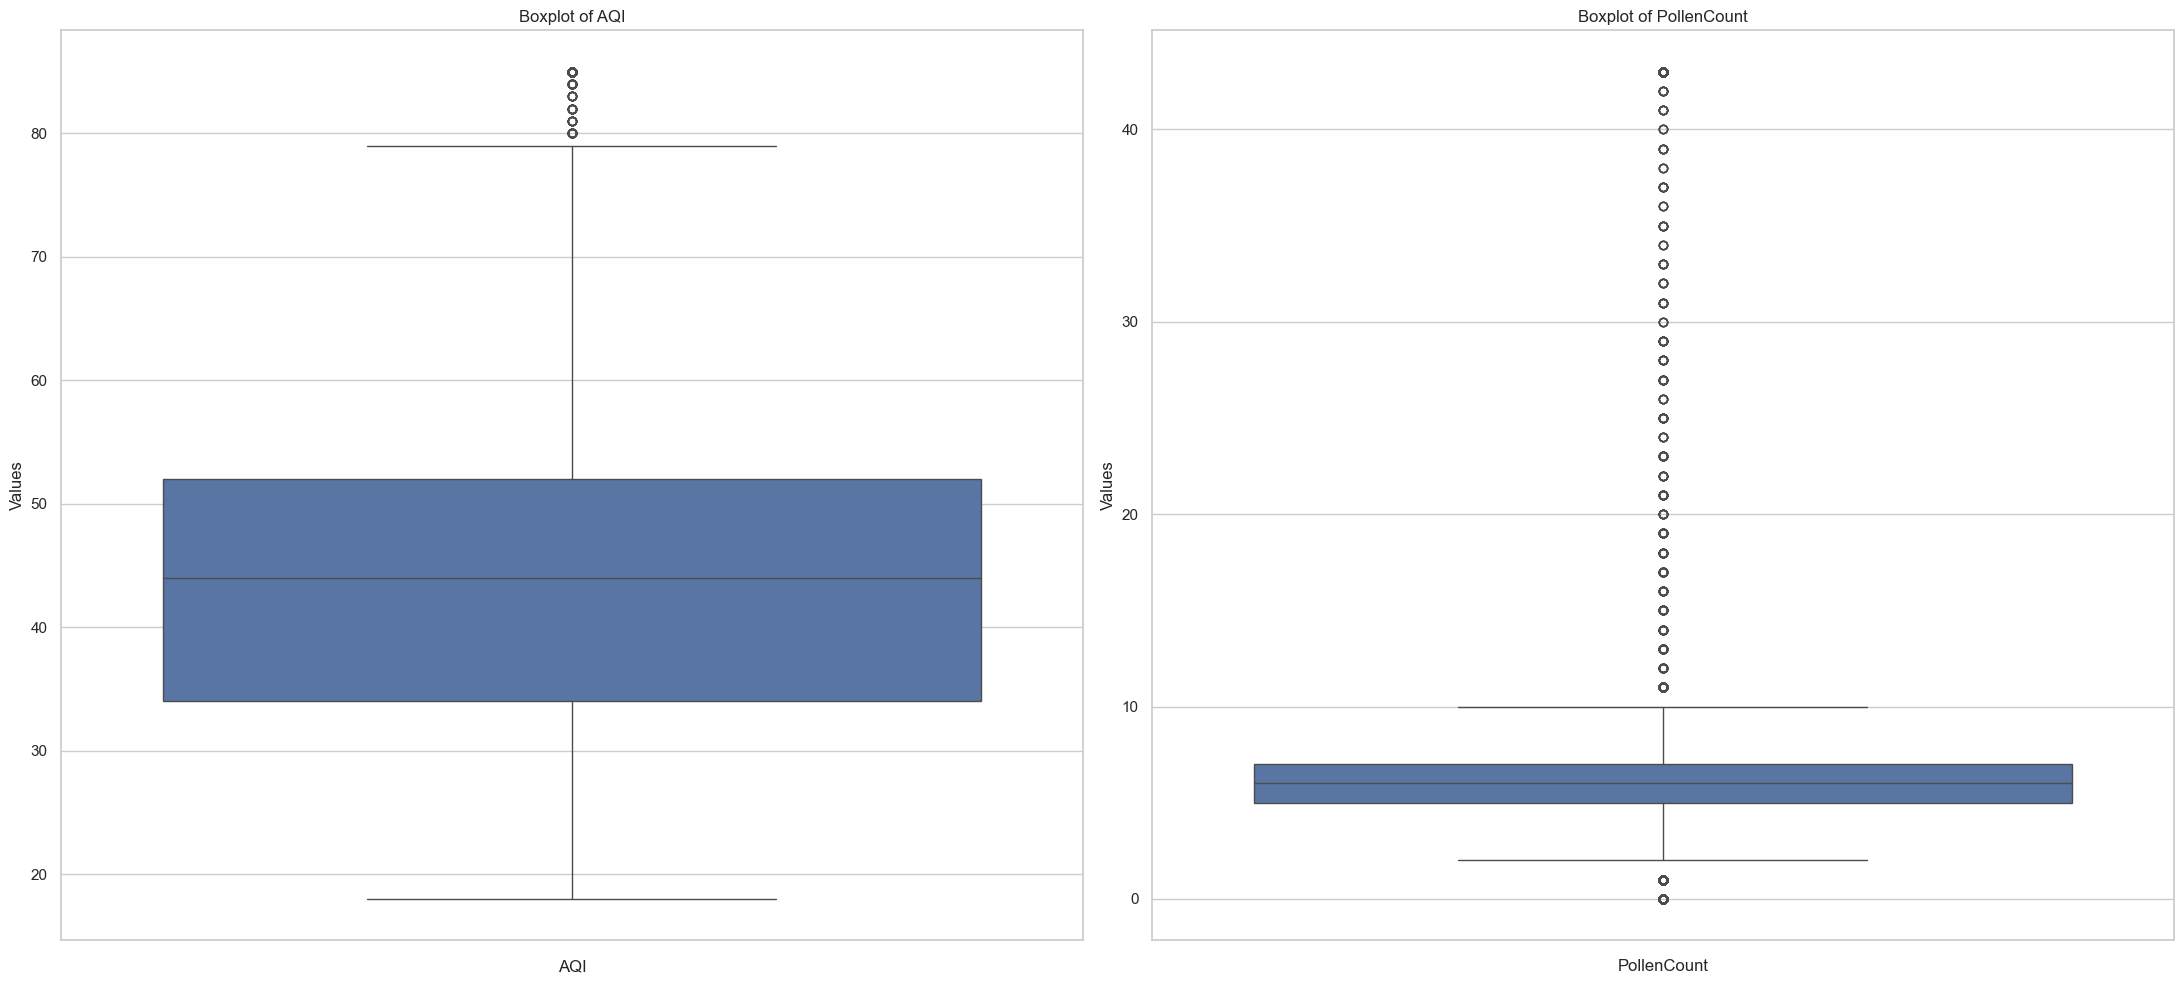

In [23]:
# Using a method to view all box plots individually in a row
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, len(df[numerical].columns), figsize=(22, 10))

for i, col in enumerate(df[numerical].columns):
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Values')

plt.tight_layout()

plt.show()


# Train Test Split

In [24]:
# Initialize a dictionary to store model performance scores
model_scores = {}

# Prepare feature matrix X and target vector y for model training and evaluation
X = df.drop('PollenCount',axis=1)
y = df['PollenCount']

#y = y.astype(int)

In [25]:
X_train,X_test ,y_train,y_test = train_test_split(X, y , test_size=0.2, random_state=0)

In [26]:
#`y_train.value_counts()` shows class imbalance. I'll use a balancing method to address this issue.
y_train.value_counts()

PollenCount
6.0     3272
3.0      431
1.0      371
5.0      321
4.0      318
8.0      314
2.0      293
7.0      291
9.0      262
10.0     217
43.0     204
0.0      189
11.0      82
13.0      34
12.0      28
19.0      27
17.0      24
15.0      23
23.0      19
18.0      18
21.0      18
16.0      18
14.0      17
27.0      16
25.0      14
29.0      12
20.0      10
31.0       9
33.0       9
28.0       8
35.0       7
22.0       6
24.0       6
37.0       5
41.0       5
42.0       4
39.0       4
32.0       4
30.0       4
38.0       3
26.0       3
34.0       3
40.0       3
36.0       1
Name: count, dtype: int64

In [27]:
#SMOTE was used to balance the dataset by generating synthetic samples for the minority class, improving model performance and reducing overfitting.
from imblearn.over_sampling import SMOTE

# Check the size of each class
class_counts = y_train.value_counts()
small_classes = class_counts[class_counts < 6].index

# Drop samples from small classes
if not small_classes.empty:
    # Filter out small classes
    filter_condition = ~y_train.isin(small_classes)
    X_train = X_train[filter_condition]
    y_train = y_train[filter_condition]

# Initialize SMOTE with k_neighbors
smote = SMOTE(random_state=42, k_neighbors=5)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
y_train_resampled.value_counts()

PollenCount
6.0     3272
13.0    3272
35.0    3272
22.0    3272
29.0    3272
25.0    3272
15.0    3272
24.0    3272
33.0    3272
23.0    3272
19.0    3272
17.0    3272
28.0    3272
21.0    3272
20.0    3272
11.0    3272
1.0     3272
14.0    3272
5.0     3272
4.0     3272
27.0    3272
43.0    3272
18.0    3272
31.0    3272
12.0    3272
3.0     3272
2.0     3272
8.0     3272
7.0     3272
9.0     3272
0.0     3272
10.0    3272
16.0    3272
Name: count, dtype: int64

In [28]:
print(f"Lenght of: \n X_train:{len(X_train)}\n X_test:{len(X_test)} \n y_train: {len(y_train)} \n y_test: {len(y_test)} ")

Lenght of: 
 X_train:6888
 X_test:1732 
 y_train: 6888 
 y_test: 1732 


## Standardization with standard scaler

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Saving the model columns 

In [30]:
feature_columns = list(X_train.columns)
# Save to a JSON file
with open('feature_columns.json', 'w') as f:
    json.dump(feature_columns, f)

# Training the Models

## Linear Discriminant Analysis

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_lda = LinearDiscriminantAnalysis()

param_lda = {
    'solver': ['svd', 'lsqr'],
    'store_covariance': [True, False],
    'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}


grid_search_lda = GridSearchCV(estimator=model_lda, param_grid=param_lda, cv=5, 
                                   n_jobs=-1, verbose=2,scoring='accuracy')
grid_search_lda.fit(X_train_scaled, y_train)

_, __ = evaluate_model(grid_search_lda, X_train_scaled, X_test_scaled, y_train, y_test, 'Linear Discriminant')

Fitting 5 folds for each of 56 candidates, totalling 280 fits
Linear Discriminant Performance Metrics:

Test Set Metrics:
Accuracy: 0.5484988452655889
Precision: 0.5830203632592148
Recall: 0.5484988452655889
F1 Score: 0.5518657322699753

Train Set Metrics:
Accuracy: 0.5630081300813008
Precision: 0.6096933902648126
Recall: 0.5630081300813008
F1 Score: 0.5584156090064077


## Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=1000, random_state=42)
param_lr = { 
    'C': np.arange(1e-5, 100, 5),
}
grid_search_lr = GridSearchCV(estimator=model_lr, param_grid=param_lr, cv=5, 
                                   n_jobs=-1, verbose=3,scoring='accuracy')
grid_search_lr.fit(X_train_scaled, y_train)

_, __ = evaluate_model(grid_search_lr, X_train_scaled, X_test_scaled, y_train, y_test, 'Logistic Regression')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Logistic Regression Performance Metrics:

Test Set Metrics:
Accuracy: 0.5814087759815243
Precision: 0.5623989996265293
Recall: 0.5814087759815243
F1 Score: 0.560447227369281

Train Set Metrics:
Accuracy: 0.6033681765389083
Precision: 0.5984883800702897
Recall: 0.6033681765389083
F1 Score: 0.5780325189024647


## K-Nearest Neighbors)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()

param_knn = {'n_neighbors': np.arange(30, 40, 1),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2],
              'metric' : ['minkowski','euclidean','manhattan']}

grid_search_knn = GridSearchCV(estimator=model_knn, param_grid=param_knn, cv=5, 
                                   n_jobs=-1, verbose=2,scoring='accuracy')
grid_search_knn.fit(X_train_scaled, y_train)

_, __ = evaluate_model(grid_search_knn, X_train_scaled, X_test_scaled, y_train, y_test, 'K-Nearest Neighbors')

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
K-Nearest Neighbors Performance Metrics:

Test Set Metrics:
Accuracy: 0.575635103926097
Precision: 0.5666977020044225
Recall: 0.575635103926097
F1 Score: 0.5655796993505681

Train Set Metrics:
Accuracy: 0.6052555168408827
Precision: 0.5891540329099887
Recall: 0.6052555168408827
F1 Score: 0.5903571881210559


## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params_grid_rf = {
    "n_estimators": [1500],          
    "min_samples_split": [5, 11, 33],                   
    "max_depth": [2, 10, 25, None],                     
    "min_samples_leaf": [1, 2, 4, 6, 8]  
}

model_rf = RandomForestClassifier(n_jobs=-1 , random_state=42)

grid_search_rf = GridSearchCV(model_rf,params_grid_rf,n_jobs=-1,cv=3,verbose=3)
grid_search_rf.fit(X_train, y_train)

y_pred_test_rf, y_pred_train_rf = evaluate_model(grid_search_rf, X_train, X_test, y_train, y_test, 'Random Forest')

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Random Forest Performance Metrics:

Test Set Metrics:
Accuracy: 0.5952655889145496
Precision: 0.5850158560260103
Recall: 0.5952655889145496
F1 Score: 0.5809603356573122

Train Set Metrics:
Accuracy: 0.679732868757259
Precision: 0.6829284720506933
Recall: 0.679732868757259
F1 Score: 0.6652558388503722


In [38]:
class_names = grid_search_rf.best_estimator_.classes_
class_names

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       27., 28., 29., 31., 33., 35., 43.])

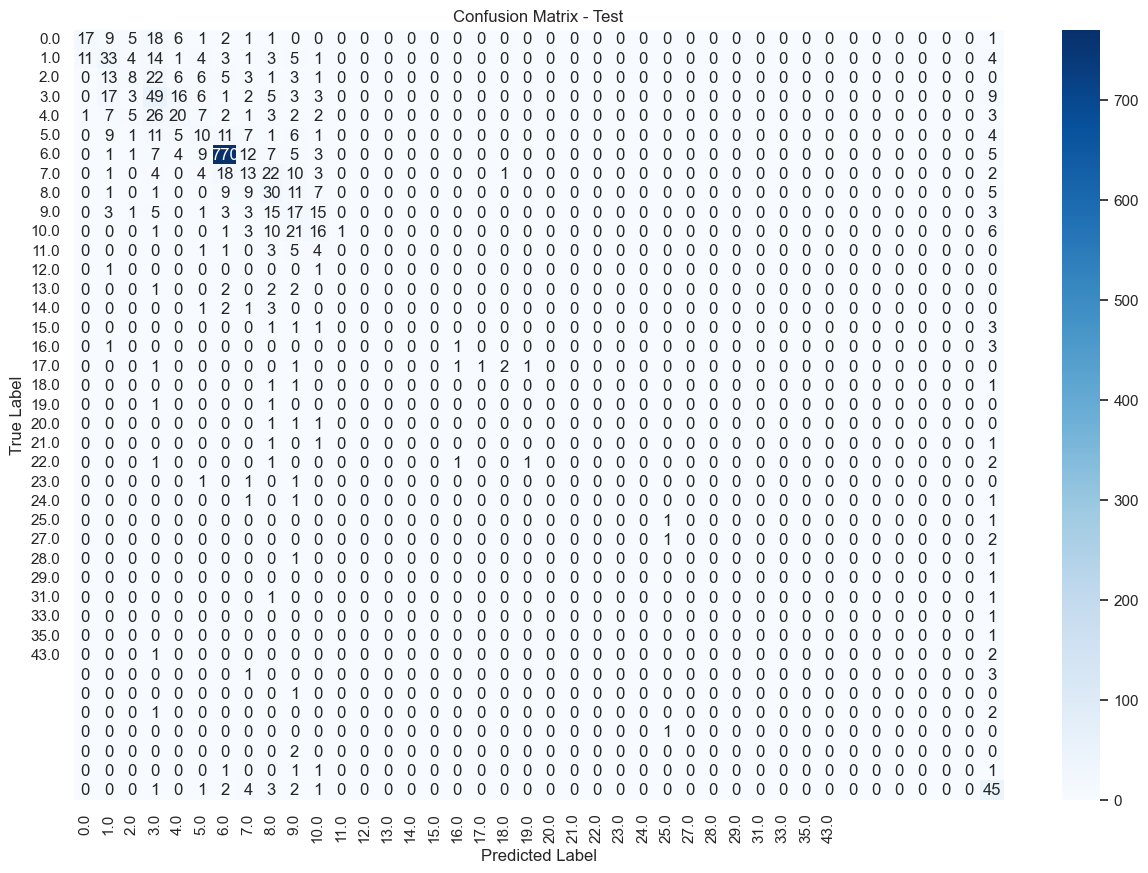

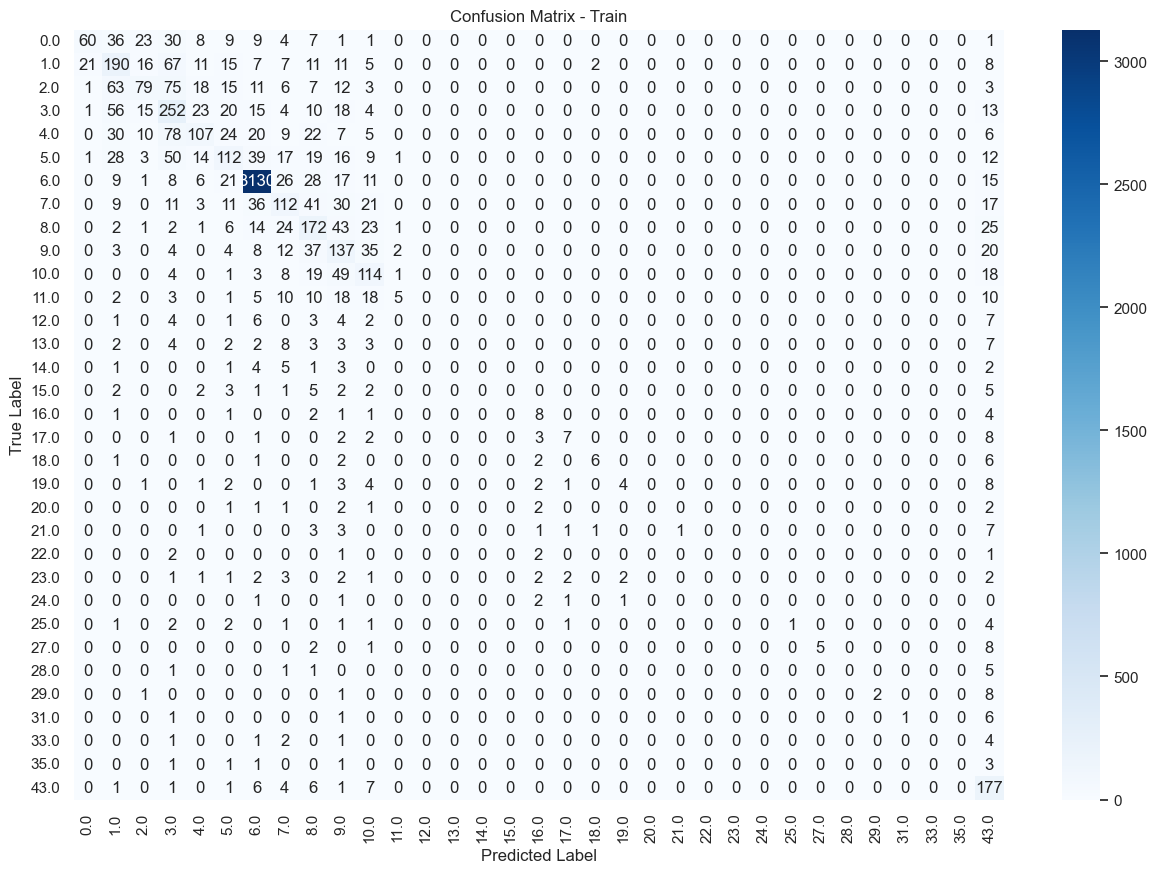

In [49]:
plot_confusion_matrices(y_test, y_pred_test_rf, y_train, y_pred_train_rf, class_names)

In [32]:
table_grid_search(grid_search_rf, all_ranks=True)

,rank_test_score,mean_test_score,mean_fit_time,mean_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators
32,1,0.603949,7.971962,1.172467,25,1,33,1500
47,2,0.603368,7.347603,0.956040,None,1,33,1500
34,3,0.601336,7.418201,0.684031,25,2,11,1500
49,4,0.601045,7.850728,1.322490,None,2,11,1500
31,5,0.599593,7.696237,1.449856,25,1,11,1500
46,6,0.599013,7.070965,1.197647,None,1,11,1500
36,7,0.598287,7.037256,0.914230,25,4,5,1500
37,8,0.598142,6.888325,0.795678,25,4,11,1500
51,9,0.597997,7.363025,0.844489,None,4,5,1500
52,10,0.597561,7.423732,0.790062,None,4,11,1500


In [51]:
rf_params = {'max_depth': 25, 'min_samples_leaf': 1, 'n_estimators': 1500,'min_samples_split': 33}
model_rf_best = RandomForestClassifier(**rf_params)
model_rf_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=25, min_samples_split=33, n_estimators=1500)

# Bagging with Random Forest

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

model_bagging =BaggingClassifier(estimator=model_rf_best, bootstrap =True , 
                             n_jobs = -1, random_state =42)

param_bag = {
    'n_estimators': [50, 100, 200, 400],  
    'max_samples': [0.5, 0.8, 1.0],  
    'max_features': [0.5, 0.8, 1.0]
}


grid_search_bag = GridSearchCV(estimator=model_bagging, param_grid= param_bag, cv=5, 
                                   n_jobs=-1, verbose=2)
grid_search_bag.fit(X_train, y_train)

_, __ = evaluate_model(grid_search_bag, X_train, X_test, y_train, y_test, 'Bagging')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


### Saving the model

In [52]:
import joblib
# save
joblib.dump(model_rf_best, "./models/random_forest.joblib")

['./models/random_forest.joblib']